In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../feature_table2.csv')
data.head()

,timestamp,node_0_boottime_event,node_0_bytes_in_event,node_0_bytes_out_event,node_0_cpu_aidle_event,node_0_cpu_idle_event,node_0_cpu_nice_event,node_0_cpu_num_event,node_0_cpu_speed_event,node_0_cpu_system_event,...,node_28_part_max_used_event,node_28_pkts_in_event,node_28_pkts_out_event,node_28_proc_run_event,node_28_proc_total_event,node_28_swap_free_event,node_28_swap_total_event,node_999_balance,node_999_balance-numeric,node_999_balance-standarddeviation
0,0.0,1.412758e+09,154.0,412.0,0.0,99.0,0.0,4.0,2834.0,0.0,...,33.0,94.0,12.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1,1.0,1.412758e+09,154.0,423.0,0.0,99.0,0.0,4.0,2834.0,0.0,...,33.0,94.0,12.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
2,2.0,1.412758e+09,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0
3,3.0,1.412758e+09,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0
4,4.0,1.412758e+09,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0


In [3]:
data['timestamp'] = data['timestamp'].astype(int)
data = data.set_index('timestamp')
cols = [c for c in data.columns if 'boottime' not in c]
data = data[cols]
data.head()

,node_0_bytes_in_event,node_0_bytes_out_event,node_0_cpu_aidle_event,node_0_cpu_idle_event,node_0_cpu_nice_event,node_0_cpu_num_event,node_0_cpu_speed_event,node_0_cpu_system_event,node_0_cpu_user_event,node_0_cpu_wio_event,...,node_28_part_max_used_event,node_28_pkts_in_event,node_28_pkts_out_event,node_28_proc_run_event,node_28_proc_total_event,node_28_swap_free_event,node_28_swap_total_event,node_999_balance,node_999_balance-numeric,node_999_balance-standarddeviation
timestamp,,,,,,,,,,,,,,,,,,,,,
0,154.0,412.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,12.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1,154.0,423.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,12.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
2,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0
3,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0
4,161.0,573.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,95.0,11.0,0.0,845.0,1012696.0,1023992.0,1.0,0.0,0.0


In [4]:
timestamps = data.index
for i in timestamps:
    if i+1 not in timestamps:
        if i+2 in timestamps:
            data.loc[i+1, :] = (data.loc[i, :] + data.loc[i+2, :]) / 2
        elif i+3 in timestamps:
            data.loc[i+1, :] = (data.loc[i, :] + data.loc[i+3, :]) * 0.33
            data.loc[i+2, :] = (data.loc[i, :] + data.loc[i+3, :]) * 0.67
data.sort_index(inplace=True)

In [5]:
periods = []
broken = True
for i in data.index:
    if broken:
        start = i
        broken = False
    else:
        end = i
    if i+1 not in data.index:
        periods.append((start, end))
        broken = True
        print("continuous between ({}, {}) for {} timesteps".format(start, end, end-start+1))

continuous between (0, 12521) for 12522 timesteps
continuous between (12534, 38098) for 25565 timesteps
continuous between (38463, 38827) for 365 timesteps
continuous between (54186, 89759) for 35574 timesteps
continuous between (89767, 90959) for 1193 timesteps


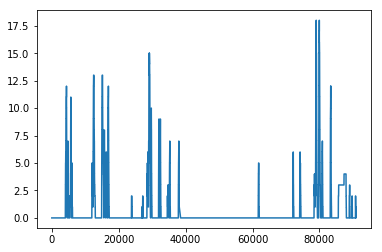

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(data.index, data.iloc[:, 120])
plt.show()

In [7]:
periods_a = [(11970, 12045), (28408, 28453), (34593, 34630), (80707, 80872)]
periods_a = [(p[0], p[1]) for p in periods_a]
periods_n = []

def extractAnomalies(period, periods_a):
    contains_a = False
    for pa in periods_a:
        if period[0]<=pa[0] and period[1]>=pa[1]:
            contains_a = True
            return extractAnomalies((period[0], pa[0]-1), periods_a) +\
                   extractAnomalies((pa[1]+1, period[1]), periods_a)
    if not contains_a:
        return [period]

for p in periods:
    periods_n += extractAnomalies(p, periods_a)
periods_a, periods_n

([(11950, 12065), (28388, 28473), (34573, 34650), (80687, 80892)],
 [(0, 11949),
  (12066, 12521),
  (12534, 28387),
  (28474, 34572),
  (34651, 38098),
  (38463, 38827),
  (54186, 80686),
  (80893, 89759),
  (89767, 90959)])

In [8]:
for pn in periods_n:
    print("from {} to {} covering {} steps".format(pn[0], pn[1], pn[1]-pn[0]+1))

from 0 to 11949 covering 11950 steps
from 12066 to 12521 covering 456 steps
from 12534 to 28387 covering 15854 steps
from 28474 to 34572 covering 6099 steps
from 34651 to 38098 covering 3448 steps
from 38463 to 38827 covering 365 steps
from 54186 to 80686 covering 26501 steps
from 80893 to 89759 covering 8867 steps
from 89767 to 90959 covering 1193 steps


In [9]:
total_n = sum([pn[1]-pn[0]+1 for pn in periods_n])
total_n * 0.6, total_n * 0.15, total_n * 0.1

(44839.799999999996, 11209.949999999999, 7473.3)

In [10]:
from numpy.random import permutation
lookback = 10
periods_split = [[], [], [], []]

proportions = {0:0.6, 1:0.15, 2:0.15, 3:0.1}
for p in periods_n:
    len_p = p[1] - p[0] + 1
    perm = permutation(4)
    cut_pos = [p[0]-1] + [int(len_p*proportions[idx]) for idx in perm]
    cut_pos = np.array(cut_pos).cumsum()
    cut_pos[-1] = p[1]   
    for idx, no_split in enumerate(perm):
        periods_split[no_split].append((cut_pos[idx]+1, cut_pos[idx+1]))

In [11]:
indice_train = [[i for i in range(p[0], p[1]+1)] for p in periods_split[0]]
indice_val1 = [[i for i in range(p[0], p[1]+1)] for p in periods_split[1]]
indice_val2 = [[i for i in range(p[0], p[1]+1)] for p in periods_split[2]]
indice_testn = [[i for i in range(p[0], p[1]+1)] for p in periods_split[3]]

In [13]:
def flattenList(l):
    return [item for subl in l for item in subl]

In [15]:
train = data.loc[flattenList(indice_train), :]
train.to_csv('../train.csv')
val1 = data.loc[flattenList(indice_val1), :]
val1.to_csv('../val1.csv')
val2 = data.loc[flattenList(indice_val2), :]
val2.to_csv('../val2.csv')
testn = data.loc[flattenList(indice_testn), :]
testn.to_csv('../testn.csv')

In [16]:
periods_a_split = [((p[0], (p[0]+p[1])//2), ((p[0]+p[1])//2+1, p[1])) for p in periods_a]
periods_a_split = [[p[0] for p in periods_a_split], [p[1] for p in periods_a_split]]
indice_vala = [[i for i in range(p[0], p[1]+1)] for p in periods_a_split[0]]
indice_testa = [[i for i in range(p[0], p[1]+1)] for p in periods_a_split[1]]

In [17]:
vala = data.loc[flattenList(indice_vala), :]
vala.to_csv('../vala.csv')
testa = data.loc[flattenList(indice_testa), :]
testa.to_csv('../testa.csv')

In [18]:
train.head()

,node_0_bytes_in_event,node_0_bytes_out_event,node_0_cpu_aidle_event,node_0_cpu_idle_event,node_0_cpu_nice_event,node_0_cpu_num_event,node_0_cpu_speed_event,node_0_cpu_system_event,node_0_cpu_user_event,node_0_cpu_wio_event,...,node_28_part_max_used_event,node_28_pkts_in_event,node_28_pkts_out_event,node_28_proc_run_event,node_28_proc_total_event,node_28_swap_free_event,node_28_swap_total_event,node_999_balance,node_999_balance-numeric,node_999_balance-standarddeviation
timestamp,,,,,,,,,,,,,,,,,,,,,
1792,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1793,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1794,156.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1795,162.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0
1796,163.0,419.0,0.0,99.0,0.0,4.0,2834.0,0.0,0.0,0.0,...,33.0,94.0,11.0,0.0,844.0,1012696.0,1023992.0,1.0,0.0,0.0


In [22]:
with open('../periods_split.txt', 'w') as f:
    f.write("normal periods:\n")
    for subl in periods_split:
        f.write("{}\n".format(subl))
    f.write("abnormal periods:\n")
    for subl in periods_a_split:
        f.write("{}\n".format(subl))